## 1. Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

## 2. Gather data

In [31]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('apps.csv')
print(apps_with_duplicates.shape)
# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps -> there was no duplicates
print(apps.shape)

# # Have a look at a random sample of 5 rows
display(apps.head(3))

(9659, 14)
(9659, 14)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [32]:
# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')
reviews_df.head()

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## 3. Data cleaning
<p>Data cleaning is one of the most essential subtask any data science project. Although it can be a very tedious process, it's worth should never be undermined.</p>
<p>By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like <code>Installs</code> and <code>Price</code> have a few special characters (<code>+</code> <code>,</code> <code>$</code>) due to the way the numbers have been represented. This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from [0-9].</p>
<p>Hence, we now proceed to clean our data. Specifically, the special characters <code>,</code> and <code>+</code> present in <code>Installs</code> column and <code>$</code> present in <code>Price</code> column need to be removed.</p>
<p>It is also always a good practice to print a summary of your dataframe after completing data cleaning. We will use the <code>info()</code> method to acheive this.</p>

### Data types

In [33]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [34]:
apps['Price'] = apps["Price"].apply(lambda x: x.replace('$','')).astype('float')
apps['Installs']=apps['Installs'].apply(lambda x: x.replace('+','').replace(',','')).astype('int')

In [35]:
# # List of characters to remove
# chars_to_remove = ['+',',','$']
# # List of column names to clean
# cols_to_clean = ['Installs','Price']

# # Loop for each column in cols_to_clean
# for col in cols_to_clean:
#     # Loop for each char in chars_to_remove
#     for char in chars_to_remove:
#         # Replace the character with an empty string
#         apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# # Print a summary of the apps dataframe
# print(apps.info())

<p>From the previous task we noticed that <code>Installs</code> and <code>Price</code> were categorized as <code>object</code> data type (and not <code>int</code> or <code>float</code>) as we would like. This is because these two columns originally had mixed input types: digits and special characters. To know more about Pandas data types, read <a href="https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/">this</a>.</p>
<p>The four features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, <code>Rating</code> and <code>Price</code>. While <code>Size</code> and <code>Rating</code> are both <code>float</code> (i.e. purely numerical data types), we still need to work on <code>Installs</code> and <code>Price</code> to make them numeric.</p>

In [36]:
# import numpy as np

# # Convert Installs to float data type
# apps['Installs'] = apps['Installs'].astype(np.float)

# # Convert Price to float data type
# apps['Price'] = apps['Price'].astype(np.float)

# # Checking dtypes of the apps dataframe
# print(apps.dtypes)

### Missing Data
In this case, I could not do anything but drop that whole column

In [37]:
apps.isna().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [38]:
apps = apps.fillna({'Size': apps['Size'].mean()})

### Duplicated data

In [39]:
apps.drop_duplicates()
apps.shape

(9659, 14)

### Outliers

#### Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization.</p>

In [40]:
# Apps whose Price is greater than 100
apps_above_100 = apps[apps['Price'] > 100]
apps_above_100[['Category', 'App', 'Price']]

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


In [41]:
# Select apps priced below $100
apps_under_100 = apps[apps['Price'] < 100]
apps = apps_under_100

## 4. Exploring data analysis
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>
<p>We will see that there are <code>33</code> unique app categories present in our dataset. <em>Family</em> and <em>Game</em> apps have the highest market prevalence. Interestingly, <em>Tools</em>, <em>Business</em> and <em>Medical</em> apps are also at the top.</p>

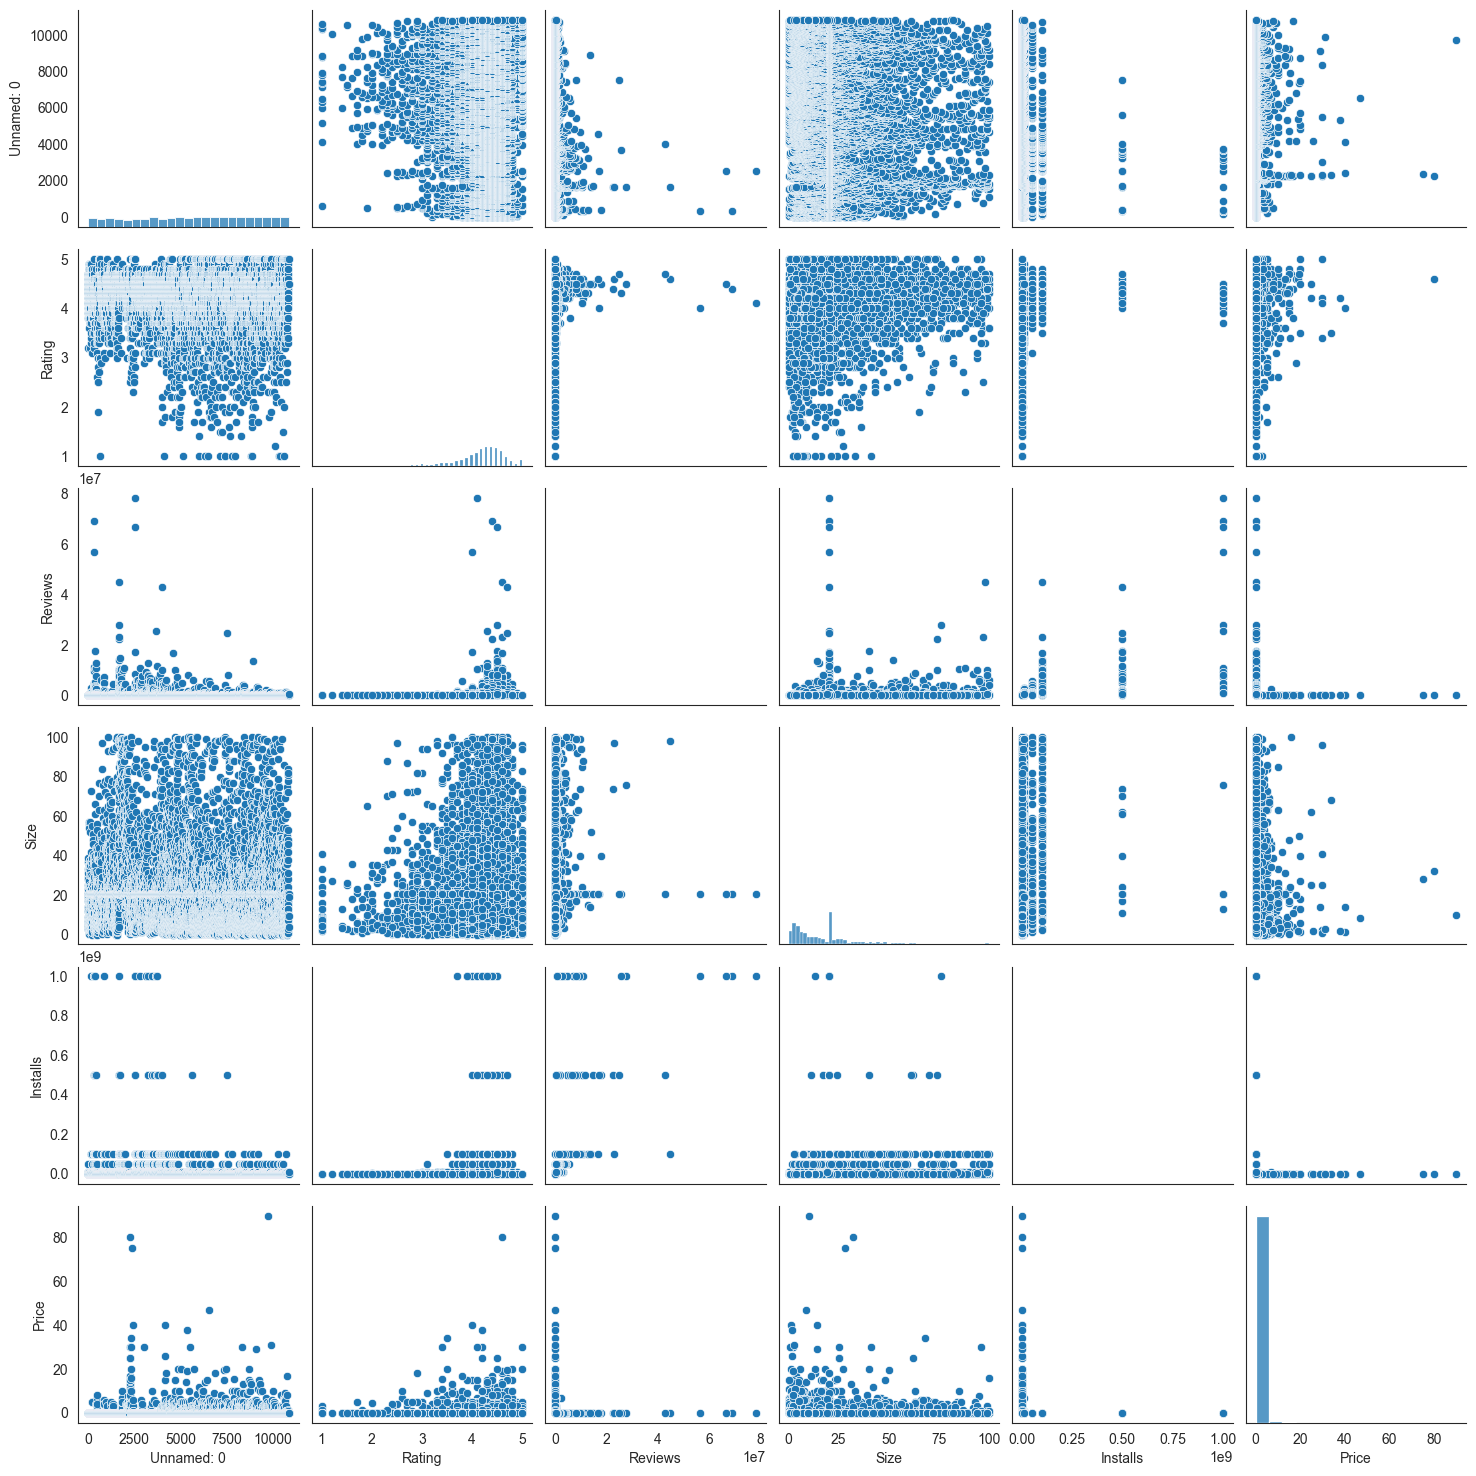

In [42]:
import seaborn as sns
sns.pairplot(apps[apps.dtypes[apps.dtypes != 'object'].index])

<Axes: >

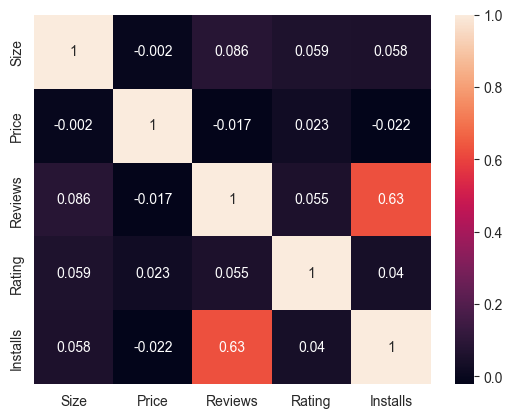

In [43]:
heat = apps[['Size','Price','Reviews','Rating','Installs']].corr()
sns.heatmap(heat, annot=True)

### Distribution of app ratings
<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>
<p>From our research, we found that the average volume of ratings across all app categories is <code>4.17</code>. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.</p>

Average app rating =  4.173805158293607


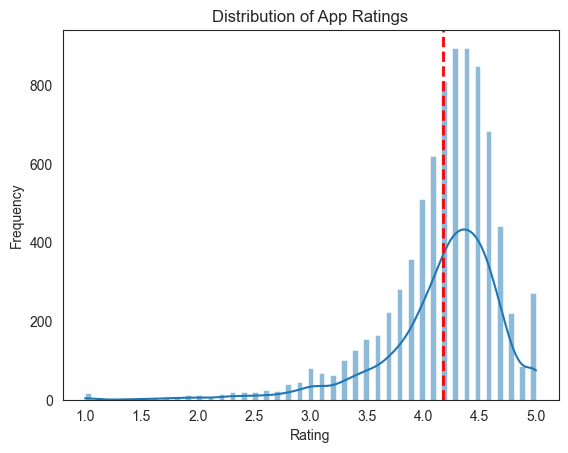

In [44]:
import matplotlib.pyplot as plt
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
fig, ax = plt.subplots()

sns.histplot(apps['Rating'], kde=True, ax=ax)
ax.axvline(avg_app_rating, color='r', linestyle='--', linewidth=2)

ax.set_title('Distribution of App Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
sns.set_style("white")

plt.show()

### Distribution of apps Installs

Average app installs =  7793621.581699346


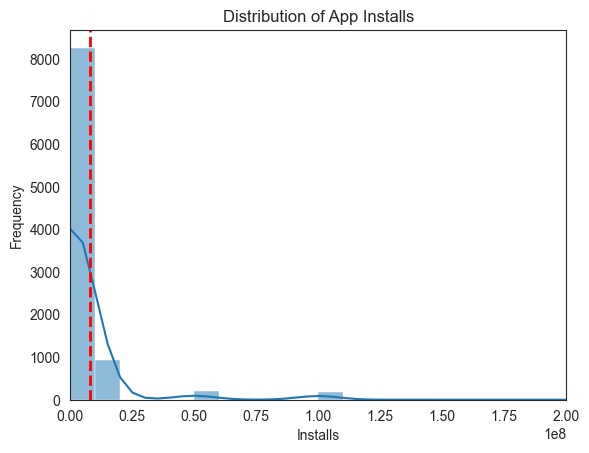

In [45]:
import matplotlib.pyplot as plt

# Average installs of apps
avg_app_installs = apps['Installs'].mean()
print('Average app installs = ', avg_app_installs)

# Distribution of apps according to their ratings
fig, ax = plt.subplots()

sns.histplot(apps['Installs'], kde=True, bins=100, ax=ax)
ax.axvline(avg_app_installs, color='r', linestyle='--', linewidth=2)

ax.set_title('Distribution of App Installs')
ax.set_xlabel('Installs')
ax.set_ylabel('Frequency')
sns.set_style("white")
ax.set_xlim(left = 0, right=0.2e9)
ax.set_ylim(bottom=0)

plt.show()

### Categories

Number of categories =  33


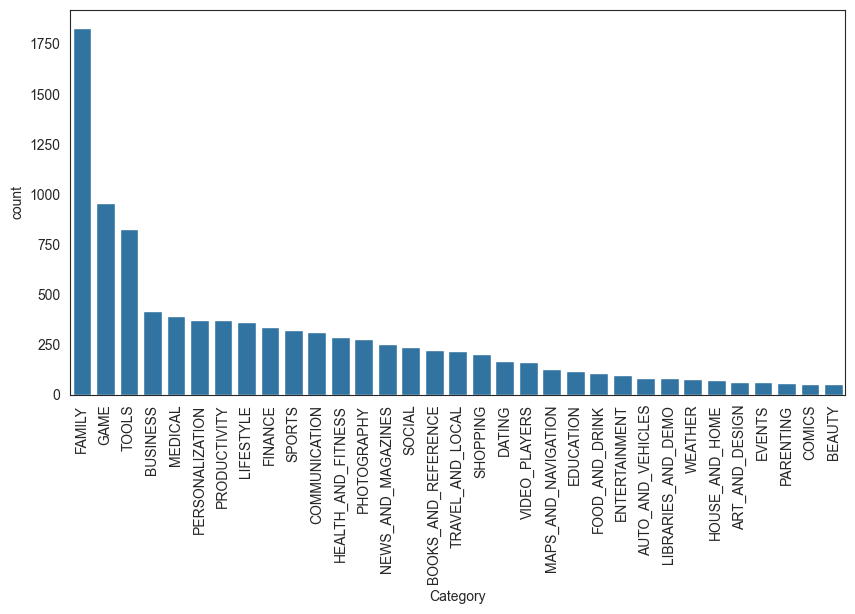

In [46]:
# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()
num_cat = num_apps_in_category.reset_index()

# Set the figure size
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='count', data=num_cat)
plt.xticks(rotation=90)
plt.show()

#### Relation between category and price
<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that <em>Medical and Family</em> apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below \$20.</p>

Text(0.5, 1.0, 'App pricing trend across categories')

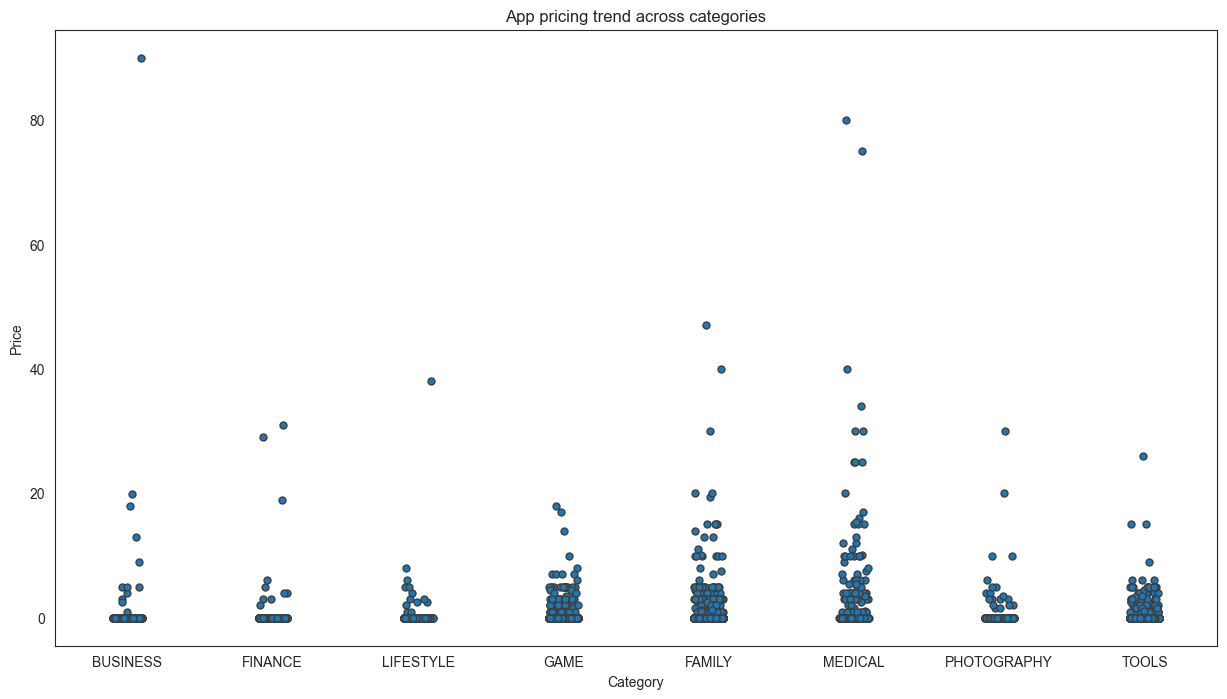

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Category'], y = popular_app_cats['Price'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

### Content rating

<Axes: xlabel='Content Rating', ylabel='count'>

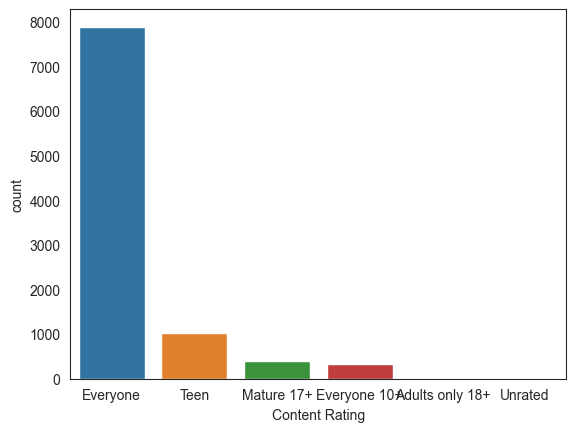

In [48]:
sns.barplot(y='count', x='Content Rating', data=apps['Content Rating'].value_counts().reset_index(), hue = 'Content Rating')


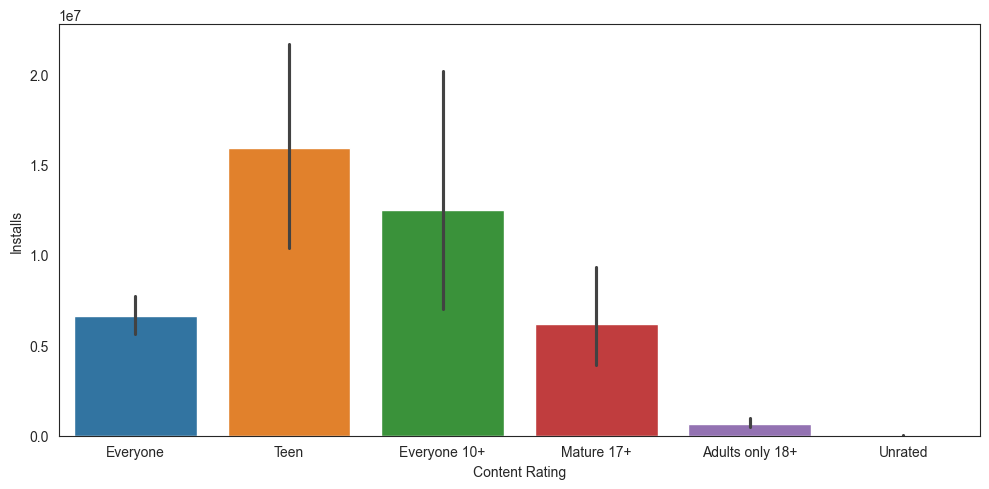

In [49]:
apps.groupby('Content Rating')['Installs'].sum()

fig, axs = plt.subplots(1, figsize=(10, 5))  # Set the figure size here
sns.barplot(x='Content Rating', y='Installs', data=apps, ax=axs, hue = 'Content Rating')
# sns.barplot(x='Content Rating', y='Rating', data=apps, ax=axs[1])
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

### Genres

<Axes: xlabel='Genres', ylabel='count'>

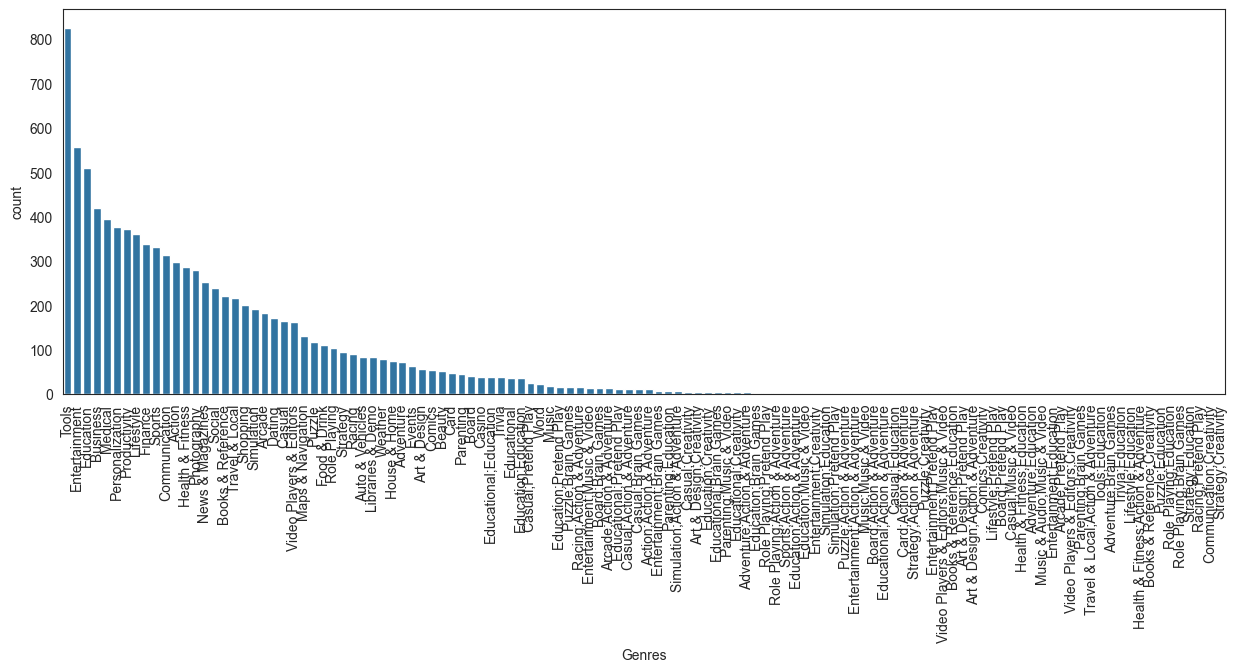

In [50]:
gen = apps.Genres.value_counts().reset_index()
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x = "Genres", y = 'count', data = gen)

### Types

<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!</p>

In [51]:
apps.Type.value_counts() # number of apps for each type

Type
Free    8903
Paid     736
Name: count, dtype: int64

c:\Users\voqua\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Type', ylabel='log_installs'>

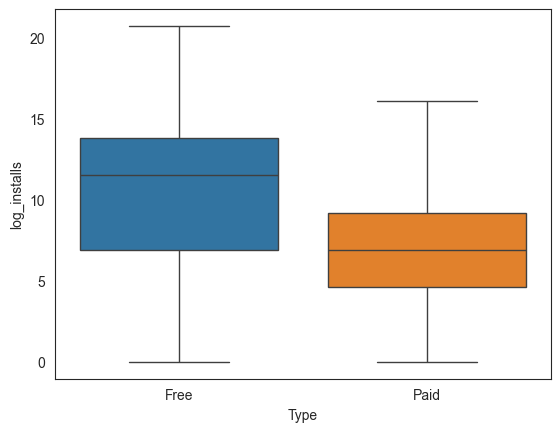

In [53]:
import numpy as np
apps['log_installs'] = np.log(apps['Installs']) 
sns.boxplot(x='Type', y='log_installs', data=apps, hue='Type')

## 5. Apply model

In [54]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9639 entries, 0 to 9658
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9639 non-null   int64  
 1   App             9639 non-null   object 
 2   Category        9639 non-null   object 
 3   Rating          8181 non-null   float64
 4   Reviews         9639 non-null   int64  
 5   Size            9639 non-null   float64
 6   Installs        9639 non-null   int64  
 7   Type            9639 non-null   object 
 8   Price           9639 non-null   float64
 9   Content Rating  9639 non-null   object 
 10  Genres          9639 non-null   object 
 11  Last Updated    9639 non-null   object 
 12  Current Ver     9631 non-null   object 
 13  Android Ver     9637 non-null   object 
 14  log_installs    9639 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 1.2+ MB


In [55]:
apps.isna().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1458
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
log_installs         0
dtype: int64

### Feature engineering (from user_reviews)
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>

<p>In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.</p>

In [57]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Review                  37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [58]:
reviews = reviews_df.dropna(thresh=2)

<Axes: xlabel='Sentiment_Polarity', ylabel='Count'>

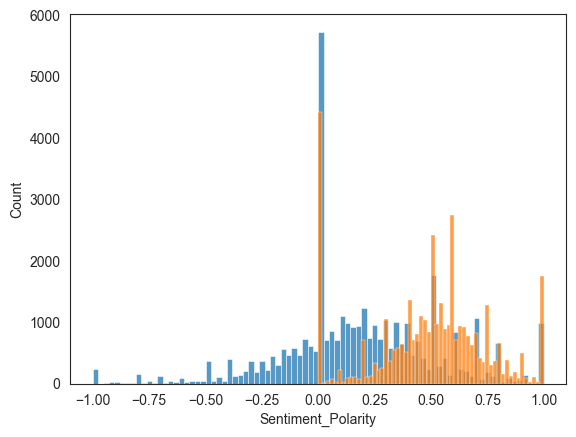

In [59]:
sns.histplot(reviews_df['Sentiment_Polarity'], kde=False)
sns.histplot(reviews_df['Sentiment_Subjectivity'], kde=False)

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

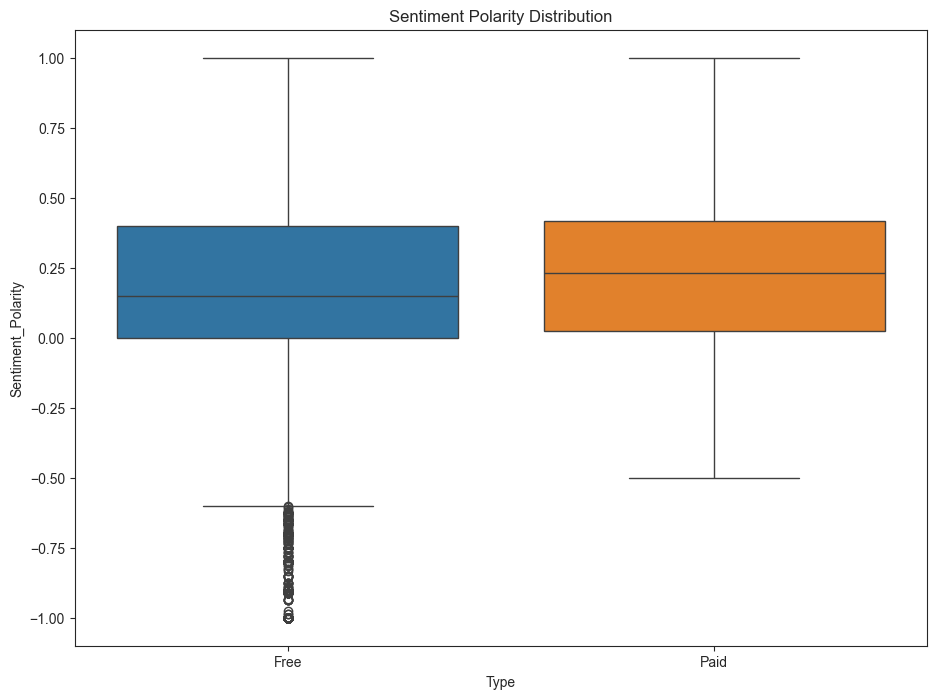

In [60]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = reviews_df.merge(apps[['App', 'Type']], on = 'App'), hue='Type')
ax.set_title('Sentiment Polarity Distribution')

<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.</p>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

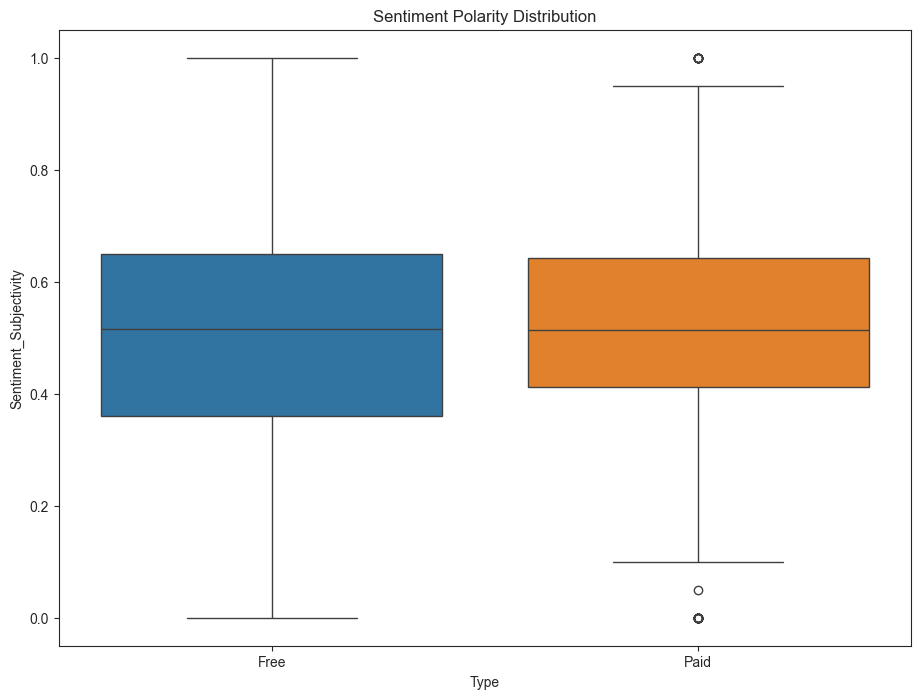

In [61]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Subjectivity', data = reviews_df.merge(apps[['App', 'Type']], on = 'App'), hue='Type')
ax.set_title('Sentiment Polarity Distribution')

#### Prepare X and Y

In [104]:
from sklearn.model_selection import train_test_split

# Drop rows with missing values in the 'Rating' column
apps_rating = apps.dropna(subset=['Rating'])

# Create dummy variables after dropping rows with missing values
cat_dum = pd.get_dummies(apps_rating['Category'], drop_first=True).astype('int64')
cont_dum = pd.get_dummies(apps_rating['Content Rating'], drop_first=True).astype('int64')
type_dum = pd.get_dummies(apps_rating['Type'], drop_first=True).astype('int64')

# Concatenate the dummy variables with the relevant columns
X1 = pd.concat([cat_dum, cont_dum, type_dum, apps_rating[['App', 'Price', 'Size', 'Reviews']]], axis=1).drop('App', axis=1)  
y1 = apps_rating['Rating']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

#### Train model


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X1_train, y1_train)


LinearRegression()

In [106]:
import statsmodels.api as sm
# Add a constant to the model (intercept)
X1_train_sm = sm.add_constant(X1_train)

# Linear Regression model summary
linear_model_sm = sm.OLS(y1_train, X1_train_sm).fit()
print(linear_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     5.597
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           1.86e-27
Time:                        15:22:47   Log-Likelihood:                -5109.7
No. Observations:                6544   AIC:                         1.030e+04
Df Residuals:                    6502   BIC:                         1.059e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.2704    

In [109]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X1_train, y1_train)
print("Coefficients:", lasso_model.coef_)


Coefficients: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  4.82381592e-03  1.24566507e-03
  1.54922382e-08]


#### Evaluate model


In [112]:
from sklearn.metrics import mean_squared_error, r2_score
y1_pred = linear_model.predict(X1_test)
mse = mean_squared_error(y1_test, y1_pred)
print(mse)

0.27784674918355795


In [114]:
y1_train_lasso = lasso_model.predict(X1_train)
y1_test_lasso = lasso_model.predict(X1_test)
mse = mean_squared_error(y1_test, y1_test_lasso)
r2 = r2_score(y1_train, y1_train_lasso)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.28224274406259464
R^2 Score: 0.006176363151879638
